# Dataset

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Coding_study/data/penguins.csv',index_col=0)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
# Shape of data
df.shape

(344, 8)

In [ ]:
# 결측치 확인
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [ ]:
# 결측치 제거
df = df.dropna().reset_index(drop=True)

In [ ]:
# 결측치 확인
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

연도 변수는 독립 변수에서 제외

In [ ]:
df = df.iloc[:,:-1]
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [ ]:
df.shape

(333, 7)

In [ ]:
# Convert categorical variable into dummy

island_dummies = pd.get_dummies(df.island)
sex_dummies = pd.get_dummies(df.sex)

In [ ]:
island_dummies.head()

,Biscoe,Dream,Torgersen
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


## Concatenate dataframe

In [ ]:
df = pd.concat([df,island_dummies,sex_dummies],axis=1)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream,Torgersen,female,male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,0,0,1,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,0,0,1,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,0,0,1,1,0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,0,0,1,1,0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,0,0,1,0,1


In [ ]:
df = df.drop(['island','sex'],axis=1)
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Biscoe,Dream,Torgersen,female,male
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1,1,0
3,Adelie,36.7,19.3,193.0,3450.0,0,0,1,1,0
4,Adelie,39.3,20.6,190.0,3650.0,0,0,1,0,1


In [ ]:
df.shape

(333, 10)

## Labels

In [ ]:
df.species.value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [ ]:
# 문자열 형태를 정수형으로 변환
def make_int(s):
  if s == 'Adelie':
    return 0
  elif s == 'Gentoo':
    return 1
  else:
    return 2

In [ ]:
df['species'] = df.species.apply(make_int)

In [ ]:
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Biscoe,Dream,Torgersen,female,male
0,0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,0,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,0,40.3,18.0,195.0,3250.0,0,0,1,1,0
3,0,36.7,19.3,193.0,3450.0,0,0,1,1,0
4,0,39.3,20.6,190.0,3650.0,0,0,1,0,1


나중에 one-hot encoding을 위해서는 정수형으로 바꿔주어야 함

# Holdout

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
x = df.iloc[:,1:].values
y = df.iloc[:,0]

In [ ]:
x[0]

array([  39.1,   18.7,  181. , 3750. ,    0. ,    0. ,    1. ,    0. ,
          1. ])

In [ ]:
y[0]

0

In [ ]:
# One-hot encoding
y_one_hot = tf.keras.utils.to_categorical(y)

In [ ]:
y_one_hot[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y_one_hot,test_size=0.1,shuffle=True)

In [ ]:
print('Shape of x train : ',x_train.shape)
print('Shape of x test : ',x_test.shape)
print('Shape of y train : ',y_train.shape)
print('Shape of y test : ',y_test.shape)

Shape of x train :  (299, 9)
Shape of x test :  (34, 9)
Shape of y train :  (299, 3)
Shape of y test :  (34, 3)


## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train[:,:-5]

array([[  47.5,   16.8,  199. , 3900. ],
       [  43.3,   14. ,  208. , 4575. ],
       [  50. ,   16.3,  230. , 5700. ],
       ...,
       [  41.1,   19. ,  182. , 3425. ],
       [  39.6,   18.1,  186. , 4450. ],
       [  49.8,   15.9,  229. , 5950. ]])

In [ ]:
scaler.fit(x_train[:,:-5])

StandardScaler()

In [ ]:
x_train_std = scaler.transform(x_train[:,:-5])
x_test_std = scaler.transform(x_test[:,:-5])

In [ ]:
x_train_std[0]

array([ 0.64, -0.18, -0.15, -0.39])

In [ ]:
x_train_std = np.concatenate([x_train_std,x_train[:,-5:]],axis=1)
x_test_std = np.concatenate([x_test_std,x_test[:,-5:]],axis=1)

In [ ]:
x_train_std[0]

array([ 0.64, -0.18, -0.15, -0.39,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ])

In [ ]:
x_test_std[0]

array([1.26, 0.07, 1.92, 1.72, 1.  , 0.  , 0.  , 0.  , 1.  ])

# Model

- 첫 번째 은닉층의 node 수는 256
- 두 번째 은닉층의 node 수는 128
- 두 번째 은닉층 이후에 Dropout 적용
- 모든 활성화 함수는 ReLU(분류 층 제외)

## Sequential

In [ ]:
# 모형 설계
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(9,))
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(3,activation='softmax'))

In [ ]:
# 모형 구조 보기
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               2560      
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                                 
Total params: 35,843
Trainable params: 35,843
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# 학습
history = model.fit(x_train_std,y_train,epochs=100,batch_size=32,validation_split=0.1)

Epoch 1/100
9/9 [==============================] - 1s 37ms/step - loss: 0.7903 - accuracy: 0.8104 - val_loss: 0.4614 - val_accuracy: 0.9000
Epoch 2/100
9/9 [==============================] - 0s 13ms/step - loss: 0.3246 - accuracy: 0.9665 - val_loss: 0.1913 - val_accuracy: 1.0000
Epoch 3/100
9/9 [==============================] - 0s 12ms/step - loss: 0.1364 - accuracy: 0.9888 - val_loss: 0.0796 - val_accuracy: 1.0000
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0630 - accuracy: 0.9963 - val_loss: 0.0342 - val_accuracy: 1.0000
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 0.0340 - accuracy: 0.9963 - val_loss: 0.0159 - val_accuracy: 1.0000
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0240 - accuracy: 0.9926 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 7/100
9/9 [==============================] - 0s 10ms/step - loss: 0.0231 - accuracy: 0.9926 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 8/100
9/9 [=====

### 시각화

In [ ]:
import matplotlib.pyplot as plt

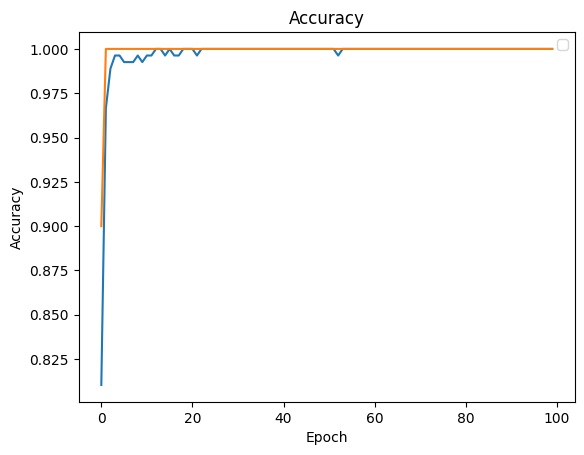

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

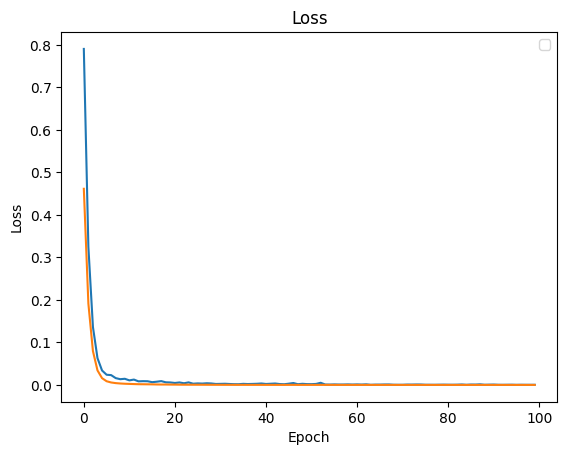

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.show()

### 평가

In [ ]:
score = model.evaluate(x_test_std,y_test,verbose=0)

In [ ]:
score

[0.0024203371722251177, 1.0]

첫 번째가 손실, 두 번째가 정확도

In [ ]:
print('Loss of model : ',np.round(score[0],4))
print(f'Accuracy of model : {score[1]*100}%')

Loss of model :  0.0024
Accuracy of model : 100.0%


### 추론

In [ ]:
y_test[0]

array([0., 1., 0.], dtype=float32)

In [ ]:
model.predict(x_test_std[0].reshape(1,-1),verbose=0)

array([[0., 1., 0.]], dtype=float32)

## Funtional

Skip connection 등과 같이 층들과의 또 다른 관계식을 표현할 때는 단순히 연속적으로 층을 쌓아서는 할 수 없음. 이러한 부분을 해결하기 위해서는 기능적으로 층을 쌓아야함

In [ ]:
inputs = tf.keras.layers.Input(9,)
h1 = tf.keras.layers.Dense(256,activation='relu',name='Relu_layer')(inputs)
h2 = tf.keras.layers.Dense(256,activation='linear',name='Linear_layer')(inputs)
h12 = tf.keras.layers.Concatenate()([h1,h2])
outputs = tf.keras.layers.Dense(3,activation='softmax')(h12)

model = tf.keras.models.Model(inputs,outputs)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 9)]          0           []                               
                                                                                                  
 Relu_layer (Dense)             (None, 256)          2560        ['input_13[0][0]']               
                                                                                                  
 Linear_layer (Dense)           (None, 256)          2560        ['input_13[0][0]']               
                                                                                                  
 concatenate_6 (Concatenate)    (None, 512)          0           ['Relu_layer[0][0]',             
                                                                  'Linear_layer[0][0]']     

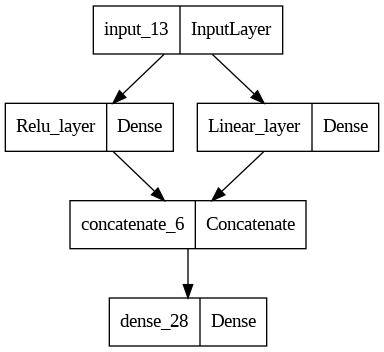

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
adam = tf.keras.optimizers.Adam(learning_rate = 1e-4)

In [ ]:
model.compile(loss=loss,optimizer=adam,metrics=['accuracy'])

### Early stopping & Model checkpoint

In [ ]:
es = tf.keras.callbacks.EarlyStopping(patience = 3, monitor = 'val_loss',mode='auto',verbose=1) # 조기 종료
mc = tf.keras.callbacks.ModelCheckpoint('./sample.h5',monitor='val_loss',mode='auto',verbose=1) # Model checkpoint

- patience : 얼마나 오랫동안 변화가 없으면 학습을 멈출 것인지를 정하는 인자

- monitor : 어떠한 지표를 참고할 것인지
- mode : monitor로 관찰하는 지표가 최저일 때를 기준으로 볼 것인지, 최고를 기준으로 볼것인지

In [ ]:
history = model.fit(x_train_std,y_train,epochs=100,batch_size=32,callbacks=[es,mc],validation_split=0.1)

Epoch 1/100
1/9 [==>...........................] - ETA: 14s - loss: 1.1781 - accuracy: 0.3750
Epoch 1: saving model to ./sample.h5
9/9 [==============================] - 2s 64ms/step - loss: 1.2048 - accuracy: 0.2677 - val_loss: 1.0961 - val_accuracy: 0.2667
Epoch 2/100
1/9 [==>...........................] - ETA: 0s - loss: 1.1013 - accuracy: 0.3750
Epoch 2: saving model to ./sample.h5
9/9 [==============================] - 0s 30ms/step - loss: 1.1070 - accuracy: 0.3383 - val_loss: 1.0129 - val_accuracy: 0.4333
Epoch 3/100
1/9 [==>...........................] - ETA: 0s - loss: 1.0505 - accuracy: 0.3750
Epoch 3: saving model to ./sample.h5
9/9 [==============================] - 0s 20ms/step - loss: 1.0183 - accuracy: 0.5019 - val_loss: 0.9355 - val_accuracy: 0.6333
Epoch 4/100
1/9 [==>...........................] - ETA: 0s - loss: 1.0053 - accuracy: 0.5312
Epoch 4: saving model to ./sample.h5
9/9 [==============================] - 0s 18ms/step - loss: 0.9364 - accuracy: 0.6097 - val_los

In [ ]:
# 저장한 모형 불러오기
model.load_weights('./sample.h5')

In [ ]:
model.evaluate(x_test_std,y_test)

2/2 [==============================] - 0s 20ms/step - loss: 0.0685 - accuracy: 1.0000


[0.06848138570785522, 1.0]

## 객체

In [ ]:
# Tensorflow dataset
train_ds = tf.data.Dataset.from_tensor_slices((x_train_std,y_train)).shuffle(100).batch(32).prefetch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test_std,y_test)).batch(32)

In [ ]:
class SampleModel(tf.keras.Model):

  def __init__(self):
    super(SampleModel,self).__init__()
    self.d1 = tf.keras.layers.Dense(256,input_dim=9,activation='relu')
    self.d2 = tf.keras.layers.Dense(128,activation='relu')
    self.outputs = tf.keras.layers.Dense(3,activation='softmax')

  def call(self, x):
    x = self.d1(x)
    x = self.d2(x)
    output = self.outputs(x)
    return output

In [ ]:
model = SampleModel()

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
model.fit(train_ds,epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 3ms/step - loss: 0.7655 - acc: 0.8194
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3052 - acc: 0.9866
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1110 - acc: 0.9900
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0431 - acc: 0.9967
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0224 - acc: 0.9967
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0151 - acc: 0.9933
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0120 - acc: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0098 - acc: 0.9967
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0089 - acc: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0077 - acc: 1.0000


In [ ]:
model.evaluate(test_ds)

2/2 [==============================] - 0s 10ms/step - loss: 0.0203 - acc: 1.0000


[0.020255427807569504, 1.0]

### Gradient Tape

In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

In [ ]:
@tf.function
def train_step(model,inputs,labels,loss_object,optimizer,train_loss,train_metric):
  with tf.GradientTape() as tape:
    preds = model(inputs)
    loss = loss_object(labels,preds)
  gradients = tape.gradient(loss, model.trainable_variables)

  optimizer.apply_gradients(zip(gradients,model.trainable_variables))
  train_loss(loss)
  train_metric(labels,preds)


In [ ]:
for epoch in range(10):
  for x, label in train_ds:
    train_step(model,x,label,loss_object,optimizer,train_loss,train_accuracy)

  print('Epoch : {} Loss : {} Accuracy : {}'.format(epoch,train_loss.result(),train_accuracy.result()*100))

Epoch : 0 Loss : 0.011812306940555573 Accuracy : 99.33110809326172
Epoch : 1 Loss : 0.007976454682648182 Accuracy : 99.6655502319336
Epoch : 2 Loss : 0.008113743737339973 Accuracy : 99.6655502319336
Epoch : 3 Loss : 0.006807760801166296 Accuracy : 99.7491683959961
Epoch : 4 Loss : 0.006038080435246229 Accuracy : 99.79933166503906
Epoch : 5 Loss : 0.005408630706369877 Accuracy : 99.83277130126953
Epoch : 6 Loss : 0.004990162327885628 Accuracy : 99.85665893554688
Epoch : 7 Loss : 0.004604077897965908 Accuracy : 99.87458038330078
Epoch : 8 Loss : 0.004298255778849125 Accuracy : 99.88851928710938
Epoch : 9 Loss : 0.004038689658045769 Accuracy : 99.89966583251953
